PIConGPU Scaling

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib widget
sns.set()

In [62]:
plt.rcParams['figure.figsize'] = [10,6]

Import Scaling Data

In [63]:
df1 = pd.read_csv("../../data/juwelsbooster/strong-scaling-16-128-nodes.csv")
df2 = pd.read_csv("../../data/juwelsbooster/strong-scaling-256-640-nodes.csv")
df3 = pd.read_csv("../../data/juwelsbooster/weak-scaling-4-128-nodes.csv")
df4 = pd.read_csv("../../data/juwelsbooster/weak-scaling-256-640-nodes.csv")
print(df1)
print(df2)
print(df3)
print(df4)

          system  nnodes   nconfig         gridconfig  simtime  fullsimtime
0  juwelsbooster      16  -d 4 4 4  -g 1024 1024 1024  466.152      512.027
1  juwelsbooster      32  -d 8 4 4  -g 1024 1024 1024  242.916      295.512
2  juwelsbooster      64  -d 8 8 4  -g 1024 1024 1024  130.772      176.304
3  juwelsbooster     128  -d 8 8 8  -g 1024 1024 1024   72.879      121.989
          system  nnodes      nconfig         gridconfig  simtime  fullsimtime
0  juwelsbooster     256    -d 16 8 8  -g 4096 2048 2048  466.608      517.947
1  juwelsbooster     384   -d 16 16 6  -g 4096 2048 2048  320.439      379.952
2  juwelsbooster     512   -d 16 16 8  -g 4096 2048 2048  242.588      297.349
3  juwelsbooster     640  -d 16 16 10  -g 4096 2048 2048  196.854      258.519
          system  nnodes   nconfig         gridconfig  simtime  fullsimtime
0  juwelsbooster       4  -d 4 4 1    -g 1024 512 512  469.091      517.847
1  juwelsbooster       8  -d 4 4 2   -g 1024 1024 512  466.177      514.9

Extract relevant columns

In [64]:
x = df1['nnodes']
x1 = df2['nnodes']
y1 = df1['simtime']
y2 = df2['simtime']

Calculate Speed-up

In [65]:
s1 = np.divide(y1[0],y1)
s2 = np.divide(y2[0],y2)

Plot

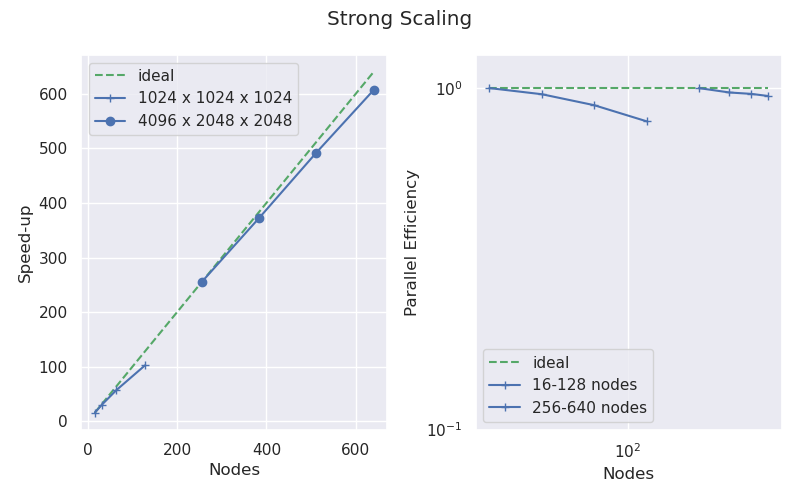

In [66]:
fig, ax = plt.subplots(1,2,figsize=(8, 5))
tmp = np.multiply(s1,16)
tmp2 = np.multiply(s2,256)
x2 = x.append(df2['nnodes'])
fig.suptitle("Strong Scaling")
ax[0].plot(x2,x2,"--", color="g", label="ideal")
ax[0].plot(x, tmp, "+-", color="b", label="1024 x 1024 x 1024")
ax[0].plot(x1, tmp2, "o-", color="b", label="4096 x 2048 x 2048")
ax[0].set_xlabel("Nodes")
ax[0].set_ylabel("Speed-up")
ax[0].legend()
var1 = np.divide(x,16)
var2 = np.divide(x1,256)
w_x1 = np.divide(tmp, np.multiply(tmp[0],var1))
w_x2 = np.divide(tmp2, np.multiply(tmp2[0],var2))
new_x = np.ones(len(x2))
ax[1].loglog(x2,new_x,"--", color="g", label="ideal")
ax[1].loglog(x,w_x1,"+-", color="b", label="16-128 nodes")
ax[1].loglog(x1,w_x2,"+-", color="b", label="256-640 nodes")
ax[1].set_ylim(0.1,1.25)
ax[1].set_xlabel("Nodes")
ax[1].set_ylabel("Parallel Efficiency")
ax[1].legend()
plt.tight_layout()
plt.show()

Weak Scaling

Extract relevant columns

In [67]:
x = df3['nnodes']
x1 = df4['nnodes']
y1 = df3['simtime']
y2 = df4['simtime']

Calculate Speed-up

In [80]:
procs_ratio1 = np.divide(x,x[0])
procs_ratio2 = np.divide(x1,x1[0])
s1 = np.multiply(procs_ratio1, np.divide(y1,y1[0]))
s2 = np.multiply(procs_ratio2, np.divide(y2,y2[0]))
s2 = np.multiply(s2,64)

0    1.0
1    1.5
2    2.0
3    2.5
Name: nnodes, dtype: float64
0    1.000000
1    0.993788
2    0.996589
3    0.993973
4    0.994138
5    0.994675
dtype: float64
0    1.000000
1    1.009105
2    1.000109
3    1.000467
dtype: float64


Plot

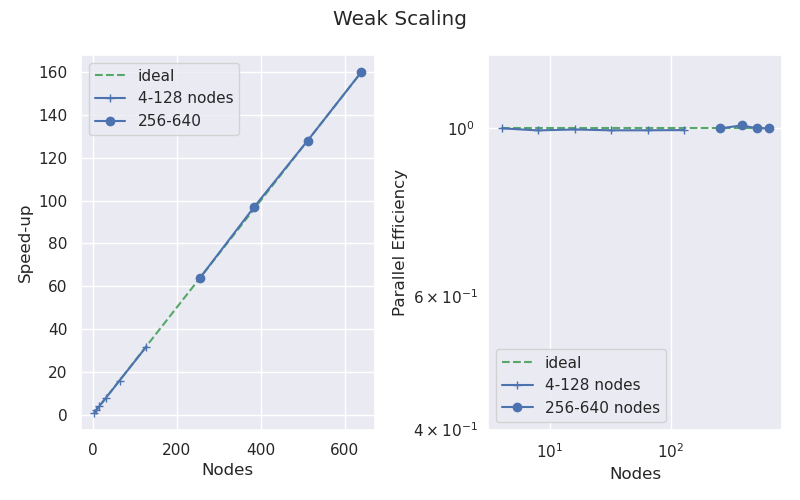

In [82]:
fig, ax = plt.subplots(1,2,figsize=(8, 5))
x2 = x.append(df4['nnodes'])
fig.suptitle("Weak Scaling")
ax[0].plot(x2,np.divide(x2,4),"--", color="g", label="ideal")
ax[0].plot(x, s1, "+-", color="b", label="4-128 nodes")
ax[0].plot(x1, s2, "o-", color="b", label="256-640")
ax[0].set_xlabel("Nodes")
ax[0].set_ylabel("Speed-up")
ax[0].legend()
w_x1 = np.divide(s1,procs_ratio1)
w_x2 = np.divide(s2, np.multiply(64,procs_ratio2))
new_x = np.ones(len(x2))
ax[1].loglog(x2,new_x,"--", color="g", label="ideal")
ax[1].loglog(x,w_x1,"+-", color="b", label="4-128 nodes")
ax[1].loglog(x1,w_x2,"o-", color="b", label="256-640 nodes")
ax[1].set_ylim(0.4,1.25)
ax[1].set_xlabel("Nodes")
ax[1].set_ylabel("Parallel Efficiency")
ax[1].legend()
plt.tight_layout()
plt.show()